In [1]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner
from copy import deepcopy

from scipy.stats import dirichlet

In [9]:
flow_filename = '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_160124_extraextralong/output.hdf5'
kde_filename = '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/KDEs_nflows_021223/output.hdf5'
flow_file = h5py.File(flow_filename, 'r')
kde_file = h5py.File(kde_filename, 'r')



chi_b = [0.,0.1,0.2,0.5]
alpha = [0.2,0.5,1.,2.,5.]

1 128000


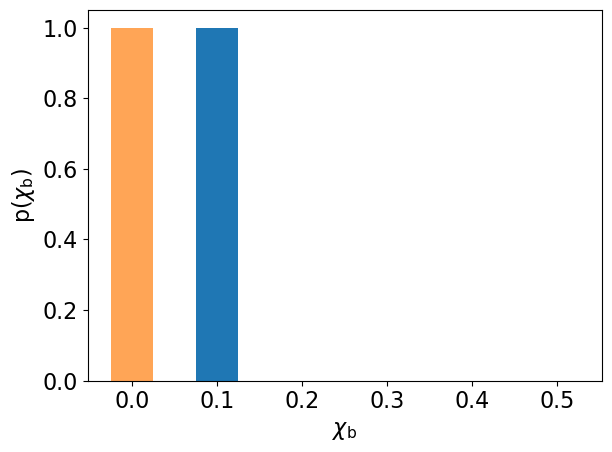

In [11]:
#relative samples in each chi_b
plt.rcParams.update({'font.size': 16})

chi_b_samps = list(flow_file['model_selection']['samples']['block1_values'][:,0])
chi_b_samps_kde = list(kde_file['model_selection']['samples']['block1_values'][:,0])

no_chib_samps_flow = np.zeros(4)
no_chib_samps_kde = np.zeros(4)

for i, samps in np.swapaxes(np.unique(chi_b_samps, return_counts=True),0,1):
    print(i,samps)
    no_chib_samps_flow[i] = samps

for i, samps in np.swapaxes(np.unique(chi_b_samps_kde, return_counts=True),0,1):
    no_chib_samps_kde[i] = samps

plt.bar(chi_b, no_chib_samps_flow/np.sum(no_chib_samps_flow), width=0.05)
plt.bar(chi_b, no_chib_samps_kde/np.sum(no_chib_samps_flow), width=0.05, alpha=0.7)
plt.xlabel(r'$\chi_\mathrm{b}$')
plt.ylabel(r'p($\chi_\mathrm{b}$)')
plt.tight_layout()
#plt.xticks([0.,1.])
plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_160124_extraextralong/plots/chib_flow_KDEcomp.pdf')

In [83]:
np.swapaxes(np.unique(chi_b_samps, return_counts=True),0,1)

array([[     1, 127468],
       [     2,    532]])

In [72]:
np.mean(chi_b_samps)

1.00415625

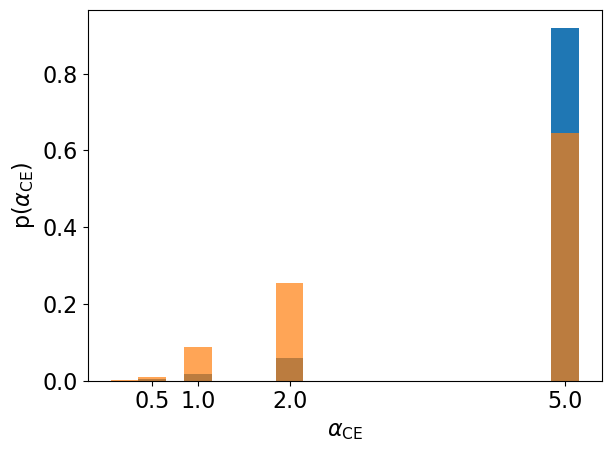

In [12]:
#relative samples in each alpha
alpha_samps = list(flow_file['model_selection']['samples']['block1_values'][:,1])
alpha_samps_kde = list(kde_file['model_selection']['samples']['block1_values'][:,1])

no_alpha_samps_flow = np.unique(alpha_samps, return_counts=True)[1]
no_alpha_samps_kde = np.unique(alpha_samps_kde, return_counts=True)[1]


plt.bar(alpha, no_alpha_samps_flow/np.sum(no_alpha_samps_flow), width=0.3)
plt.bar(alpha, no_alpha_samps_kde/np.sum(no_alpha_samps_kde), width=0.3, alpha=0.7)
plt.xticks(alpha[1:])
#plt.xscale('log')
plt.xlabel(r'$\alpha_\mathrm{CE}$')
plt.ylabel(r'p($\alpha_\mathrm{CE}$)')
plt.tight_layout()
plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_160124_extraextralong/plots/alpha_flow_KDEcomp.pdf')

In [76]:
no_alpha_samps_kde

array([    1, 90989,  4580, 18110, 14320])

100%|██████████| 36/36 [00:12<00:00,  2.93it/s]


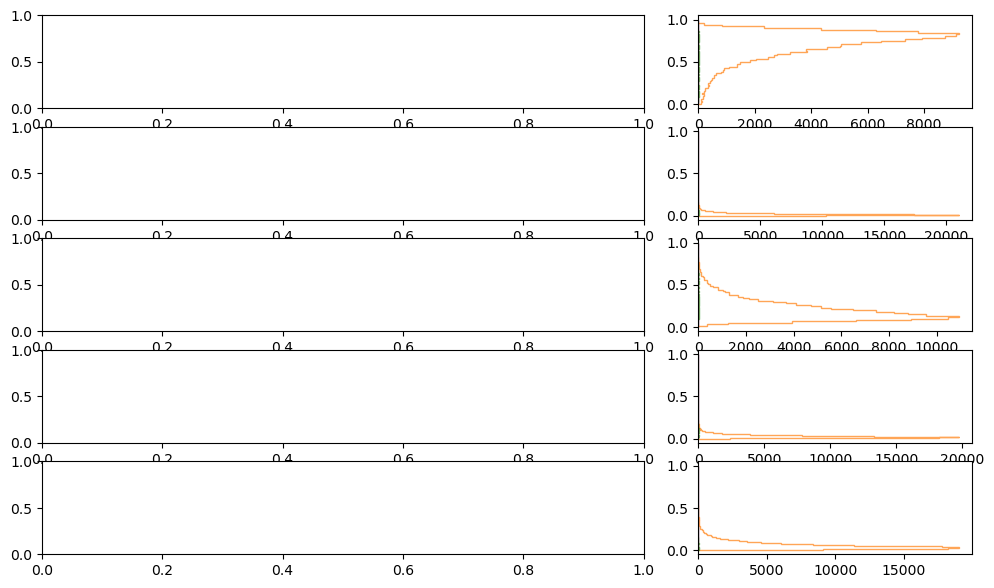

In [12]:
from matplotlib import gridspec
import sys
sys.path.append('../')
from populations.bbh_models import get_models

hyper_idx=0
Nhyper =2

branching_fracs = np.array(flow_file['model_selection']['samples']['block0_values'])
branching_fracs_kde = np.array(kde_file['model_selection']['samples']['block0_values'])
chib_alpha = np.array(flow_file['model_selection']['samples']['block1_values'])
samples_allchains = np.hstack((chib_alpha, branching_fracs))

basemdl_samps = len(np.argwhere(samples_allchains[:,hyper_idx]==0).flatten())
h_max = 0
channels = ['CE','CHE','GC','NSC','SMT']

models_path ='/Users/stormcolloms/Documents/PhD/Project_work/OneChannel_Flows/models_reduced.hdf5'
params = ['mchirp','q','chieff','z']
model_names, KDE_models = get_models(models_path, channels, params, use_flows=False, spin_distr=None, normalize=False, detectable=False)


submodels_dict = {} #dummy index dict keys:0,1,2,3, items: particular models
ctr=0 #associates with either chi_b or alpha (0 or 1)
while ctr < Nhyper:
    submodels_dict[ctr] = {}
    hyper_set = sorted(list(set([x.split('/')[ctr] for x in hyperparams])))
    for idx, model in enumerate(hyper_set): #idx associates with 0,1,2,3,(4) keys
        submodels_dict[ctr][idx] = model
    ctr += 1

fig = plt.figure(figsize=(12,7))
gs = gridspec.GridSpec(len(channels), 3, wspace=0.2, hspace=0.2)
ax_chains, ax_margs = [], []
for cidx, channel in enumerate(channels):
    ax_chains.append(fig.add_subplot(gs[cidx, :2]))
    ax_margs.append(fig.add_subplot(gs[cidx, -1]))

for midx, model in submodels_dict[hyper_idx].items():
    smdl_locs = np.argwhere(samples_allchains[:,hyper_idx]==midx).flatten()
    mdl_samps = len(smdl_locs)
    if basemdl_samps > 0:
        BF = float(mdl_samps)/basemdl_samps
    else:
        BF = float(mdl_samps)
    for cidx, channel in enumerate(channels):
        h, bins, _ = ax_margs[cidx].hist(samples_allchains[smdl_locs, cidx+Nhyper], \
            orientation='horizontal', histtype='step', bins=50, \
            alpha=0.7, label=model+', BF={0:0.1e}'.format(BF))
        h_max = h.max() if h.max() > h_max else h_max

In [10]:
hyperparams = ['chi01/alpha20',
 'chi05/alpha10',
 'chi01/alpha10',
 'chi01/alpha50',
 'chi05/alpha05',
 'chi05/alpha02',
 'chi00/alpha02',
 'chi00/alpha05',
 'chi02/alpha02',
 'chi02/alpha20',
 'chi02/alpha10',
 'chi02/alpha50',
 'chi01/alpha02',
 'chi05/alpha20',
 'chi01/alpha05',
 'chi00/alpha50',
 'chi00/alpha20',
 'chi05/alpha50',
 'chi02/alpha05',
 'chi00/alpha10']

In [6]:
np.mean(alpha_samps)

3.390671875

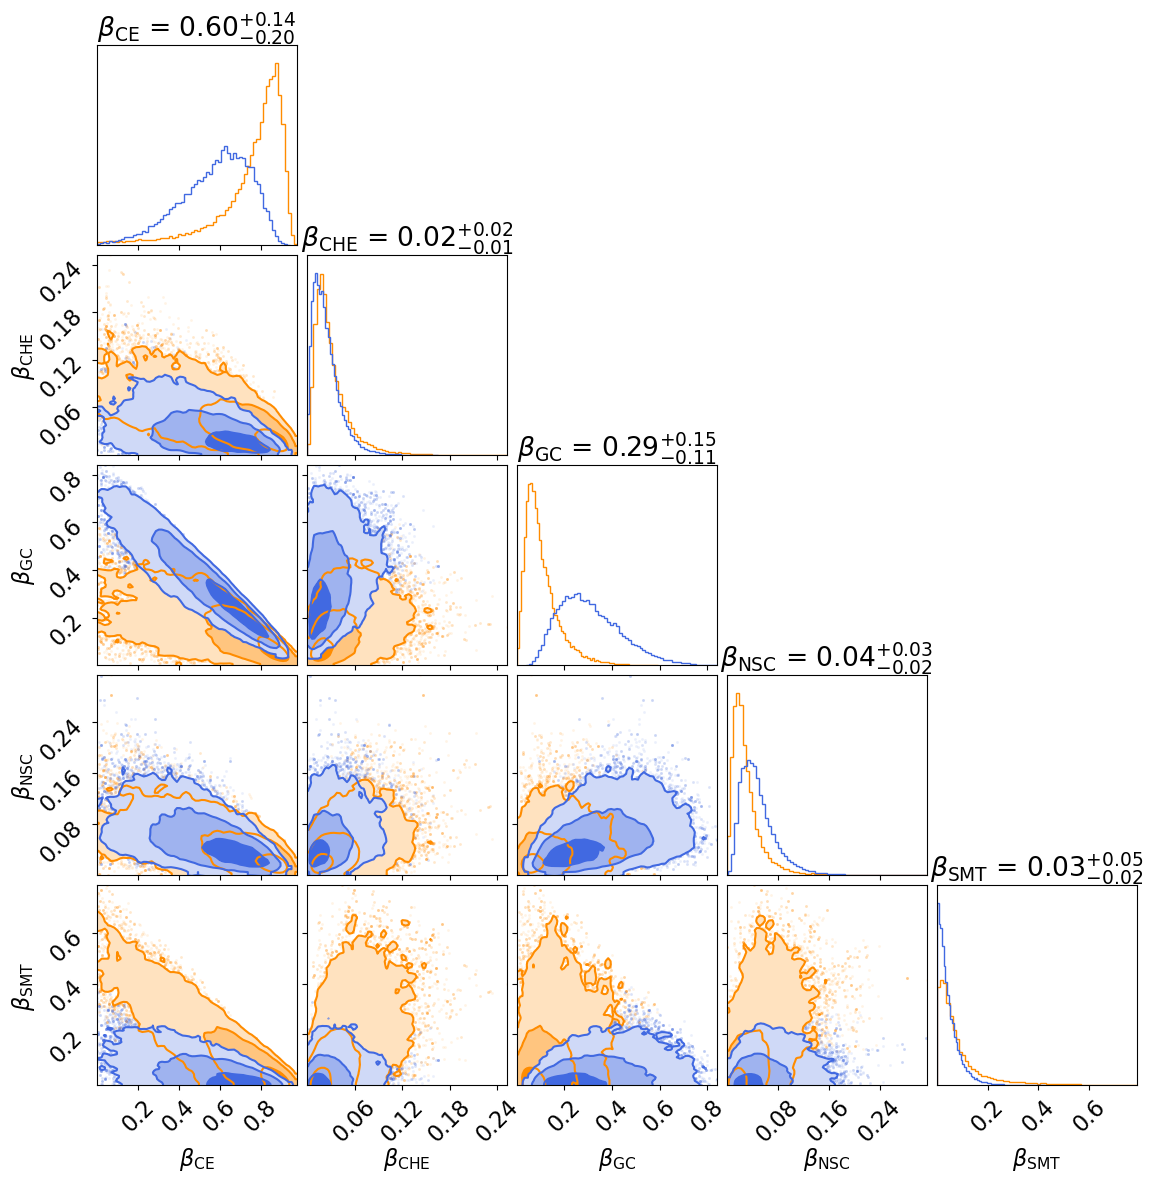

In [13]:
#corner plots of betas
branching_fracs = np.array(flow_file['model_selection']['samples']['block0_values'])
branching_fracs_kde = np.array(kde_file['model_selection']['samples']['block0_values'])
chib_alpha = np.array(flow_file['model_selection']['samples']['block1_values'])
hyperparams = np.hstack((chib_alpha, branching_fracs))

corner_kwargs = dict(
    bins=64,
    smooth=0.9,
    color="royalblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=[r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    #range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

corner_kwargs_kde = dict(
    bins=64,
    smooth=0.9,
    color="darkorange",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=[r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
)

#kwargs = deepcopy(corner_kwargs)

fig_data = corner.corner(branching_fracs_kde,  **corner_kwargs_kde)
fig_data = corner.corner(branching_fracs,fig=fig_data, **corner_kwargs)
#fig_data = corner.corner(dirichlet.pdf(np.ones(5)*0.2, np.ones(5)), fig=fig_data, **corner_kwargs_kde)
fig_data.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_160124_extraextralong/plots/BFs_flow_KDEcomp.pdf')

(array([2.2000e+01, 7.4000e+01, 3.1200e+02, 1.4910e+03, 4.6210e+03,
        1.1490e+04, 2.5680e+04, 4.1247e+04, 3.1443e+04, 1.1620e+04]),
 array([304.41962267, 306.37376714, 308.32791162, 310.2820561 ,
        312.23620057, 314.19034505, 316.14448953, 318.098634  ,
        320.05277848, 322.00692296, 323.96106743]),
 <BarContainer object of 10 artists>)

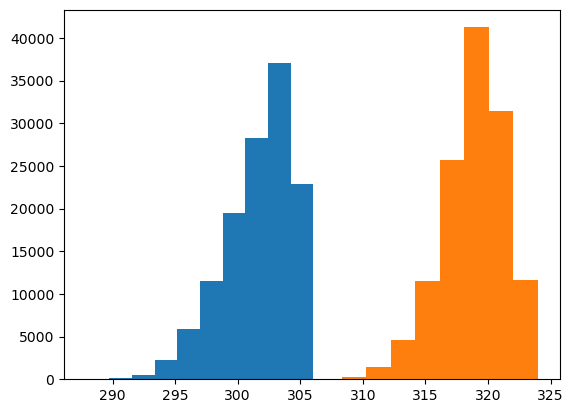

In [16]:
log_probs = list(flow_file['model_selection']['lnprb']['block0_values'])
plt.hist(np.array(log_probs[:]))
log_probs = list(kde_file['model_selection']['lnprb']['block0_values'])
plt.hist(np.array(log_probs[:]))

In [14]:
np.array(log_probs[:])

array([[304.15971735],
       [304.15971735],
       [303.80441876],
       ...,
       [301.59073746],
       [301.59073746],
       [300.85857384]])

In [10]:
print(np.mean(branching_fracs, axis=0))
print(np.mean(branching_fracs_kde, axis=0))

[0.58828515 0.01687992 0.31081667 0.03617395 0.04784432]
[0.75279734 0.03067612 0.10328986 0.02966085 0.08357583]


### Log plot of branching fractions

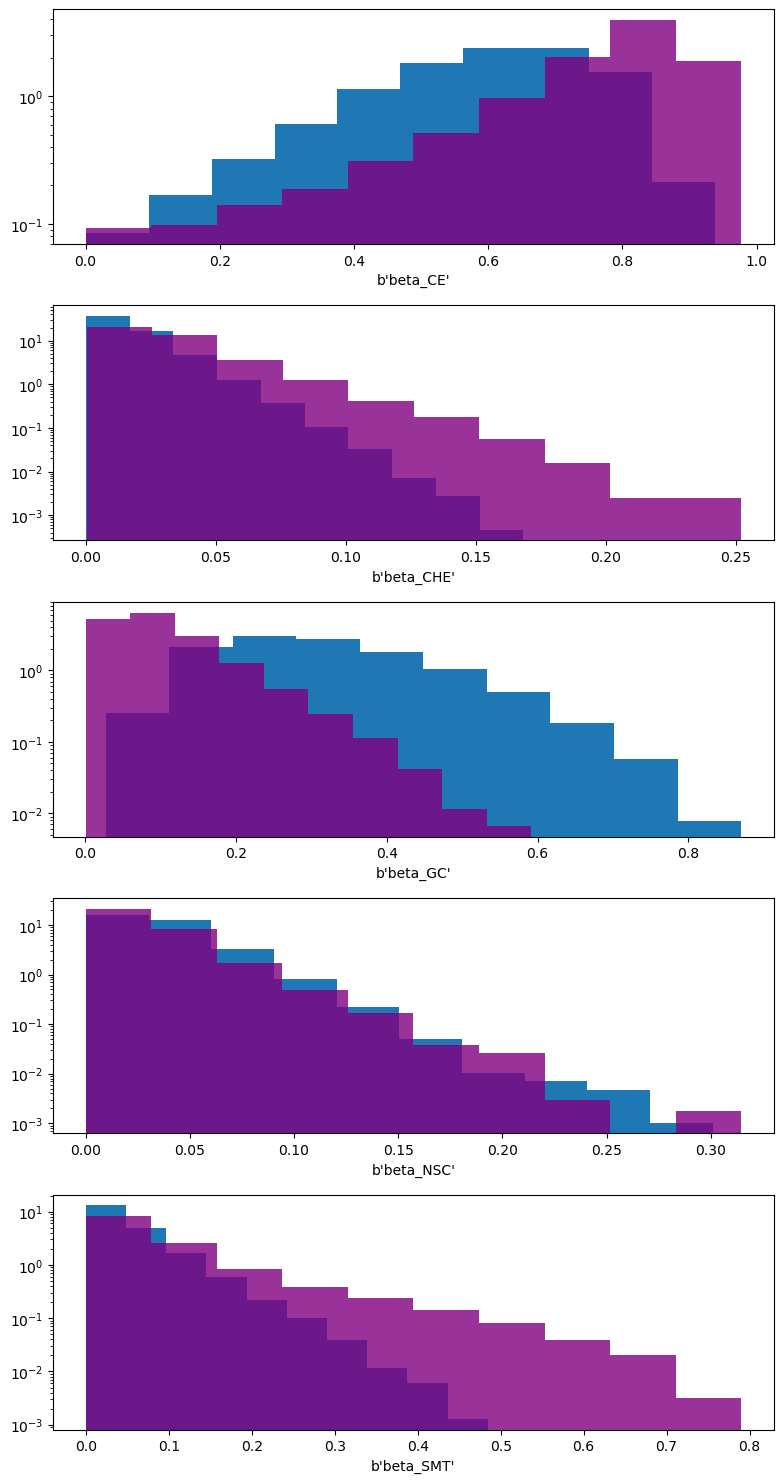

In [11]:
plt.rcParams["figure.figsize"] = (8,15)
fig, ax = plt.subplots(5)
for i in range(5):
    ax[i].hist(branching_fracs[:,i], density=True)
    ax[i].hist(branching_fracs_kde[:,i], density=True, color='purple', alpha=0.8)
    ax[i].set_yscale('log')
    ax[i].set_xlabel(list(flow_file['model_selection']['samples']['block0_items'])[i])
fig.tight_layout(pad=1.3)

## 4/5 events only

In [7]:
flow_filename = '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_150124_extralong/output.hdf5'
kde_filename = '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/KDEs_nflows_040124_5events/output.hdf5'
flow_file = h5py.File(flow_filename, 'r')
kde_file = h5py.File(kde_filename, 'r')

Rel samples in chi_b=0. = 0.97715625
Rel samples in chi_b=0.1 = 0.0121796875
Rel samples in chi_b=0.2 = 0.008
Rel samples in chi_b=0.3 = 0.0026640625


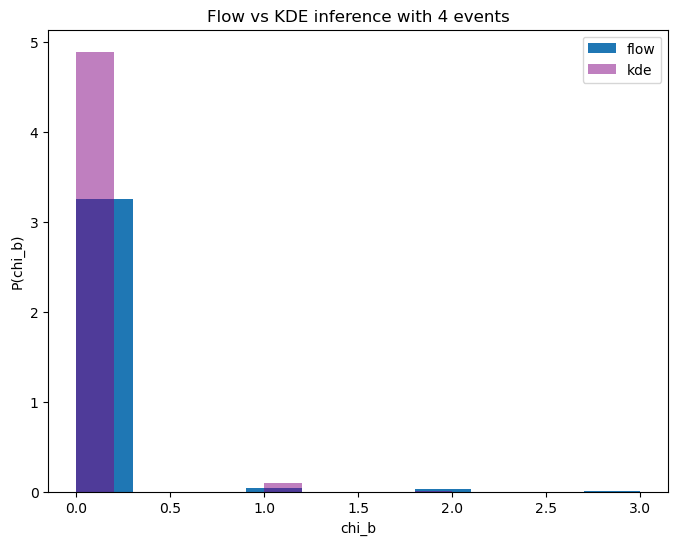

In [4]:
#relative samples in each chi_b
plt.rcParams["figure.figsize"] = (8,6)
chi_b_samps = list(flow_file['model_selection']['samples']['block1_values'][:,0])
chi_b_samps_kde = list(kde_file['model_selection']['samples']['block1_values'][:,0])

plt.hist(chi_b_samps, density=True, label='flow')
plt.hist(chi_b_samps_kde, color='Purple', density=True, label='kde', alpha=0.5)
plt.xlabel('chi_b')
plt.ylabel('P(chi_b)')
plt.legend()
plt.title('Flow vs KDE inference with 4 events')
no_chib_samps = np.zeros(4)
for i, samps in enumerate(np.unique(chi_b_samps, return_counts=True)[1]):
    no_chib_samps[i] = samps
print(f'Rel samples in chi_b=0. = {no_chib_samps[0]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.1 = {no_chib_samps[1]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.2 = {no_chib_samps[2]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.3 = {no_chib_samps[3]/len(chi_b_samps)}')

Rel samples in alpha=0.2 = 0.09578125
Rel samples in alpha=0.5 = 0.2231328125
Rel samples in alpha=1. = 0.2333046875
Rel samples in alpha=2. = 0.243390625
Rel samples in alpha=5. = 0.204390625


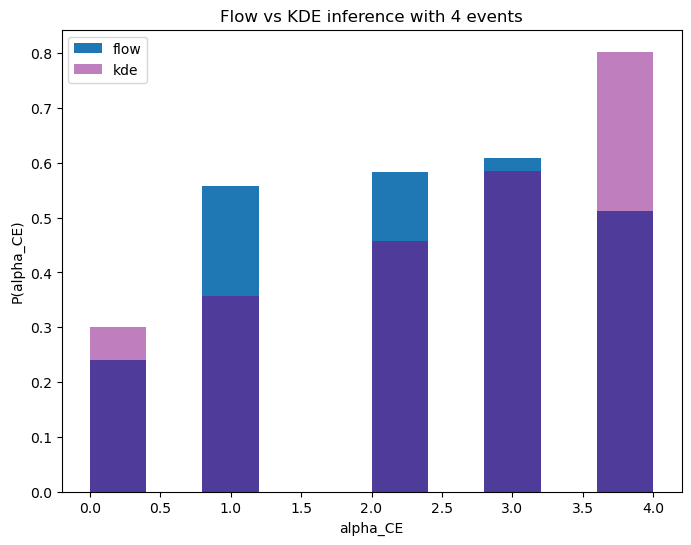

In [5]:
#relative samples in each alpha
alpha_samps = list(flow_file['model_selection']['samples']['block1_values'][:,1])
alpha_samps_kde = list(kde_file['model_selection']['samples']['block1_values'][:,1])

plt.hist(alpha_samps, density=True, label='flow')
plt.hist(alpha_samps_kde, color='Purple', density=True, label='kde', alpha=0.5)
plt.xlabel('alpha_CE')
plt.ylabel('P(alpha_CE)')
plt.legend()

plt.title('Flow vs KDE inference with 4 events')

no_alpha_samps = np.unique(alpha_samps, return_counts=True)[1]
print(f'Rel samples in alpha=0.2 = {no_alpha_samps[0]/len(alpha_samps)}')
print(f'Rel samples in alpha=0.5 = {no_alpha_samps[1]/len(alpha_samps)}')
print(f'Rel samples in alpha=1. = {no_alpha_samps[2]/len(alpha_samps)}')
print(f'Rel samples in alpha=2. = {no_alpha_samps[3]/len(alpha_samps)}')
print(f'Rel samples in alpha=5. = {no_alpha_samps[4]/len(alpha_samps)}')

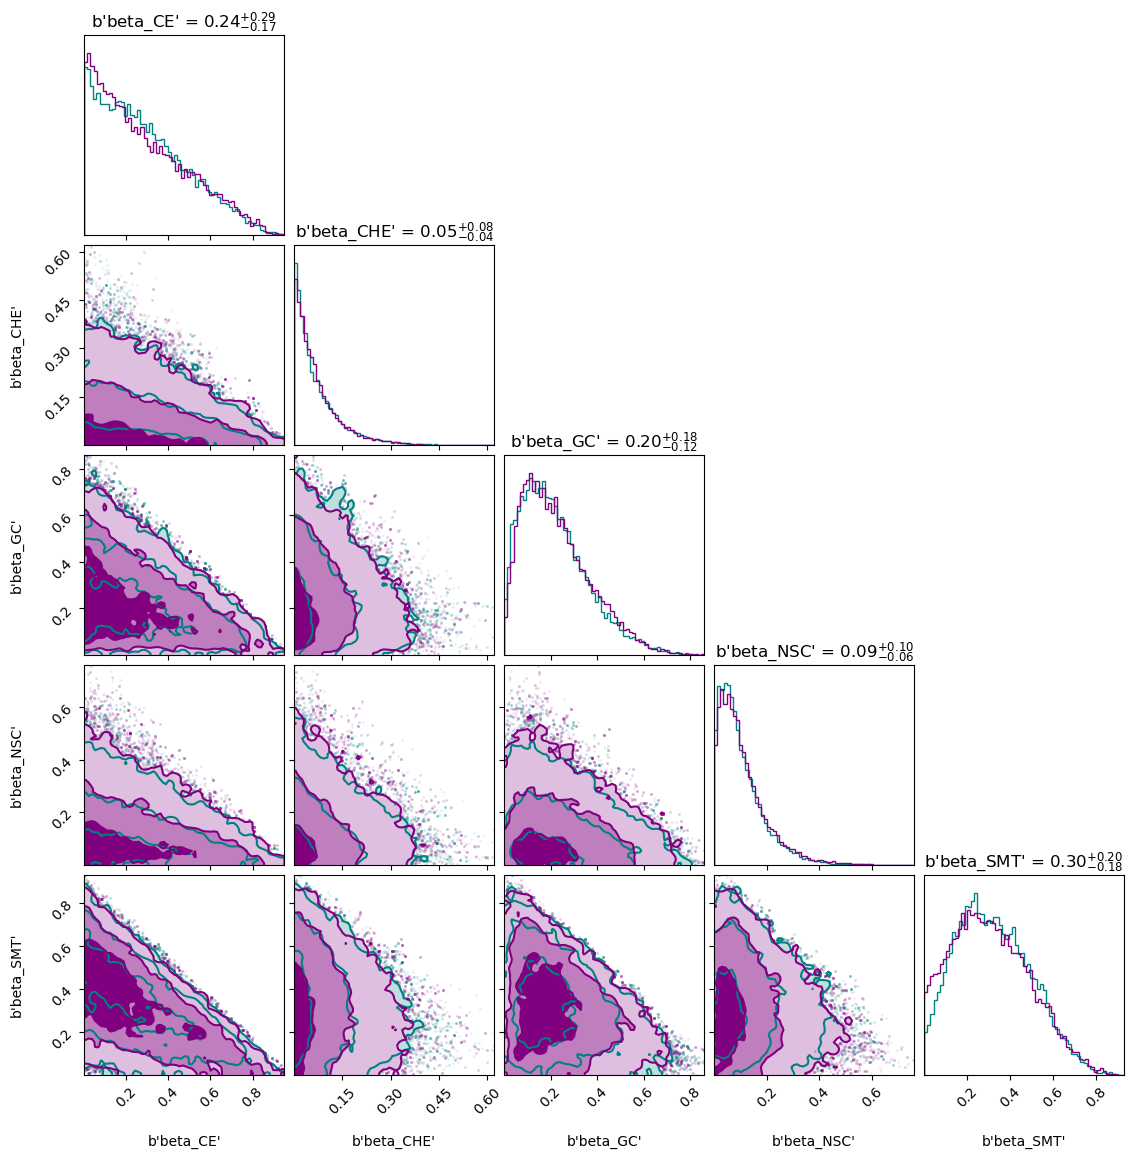

In [8]:
#corner plots of betas
branching_fracs = np.array(flow_file['model_selection']['samples']['block0_values'])
branching_fracs_kde = np.array(kde_file['model_selection']['samples']['block0_values'])
chib_alpha = np.array(flow_file['model_selection']['samples']['block1_values'])
hyperparams = np.hstack((chib_alpha, branching_fracs))

corner_kwargs = dict(
    bins=64,
    smooth=0.9,
    color="teal",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=list(flow_file['model_selection']['samples']['block0_items']),
    #range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

corner_kwargs_kde = dict(
    bins=64,
    smooth=0.9,
    color="purple",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=list(flow_file['model_selection']['samples']['block0_items']),
)

#kwargs = deepcopy(corner_kwargs)
fig_data = corner.corner(branching_fracs, **corner_kwargs)
fig_data = corner.corner(branching_fracs_kde, fig=fig_data, **corner_kwargs_kde)

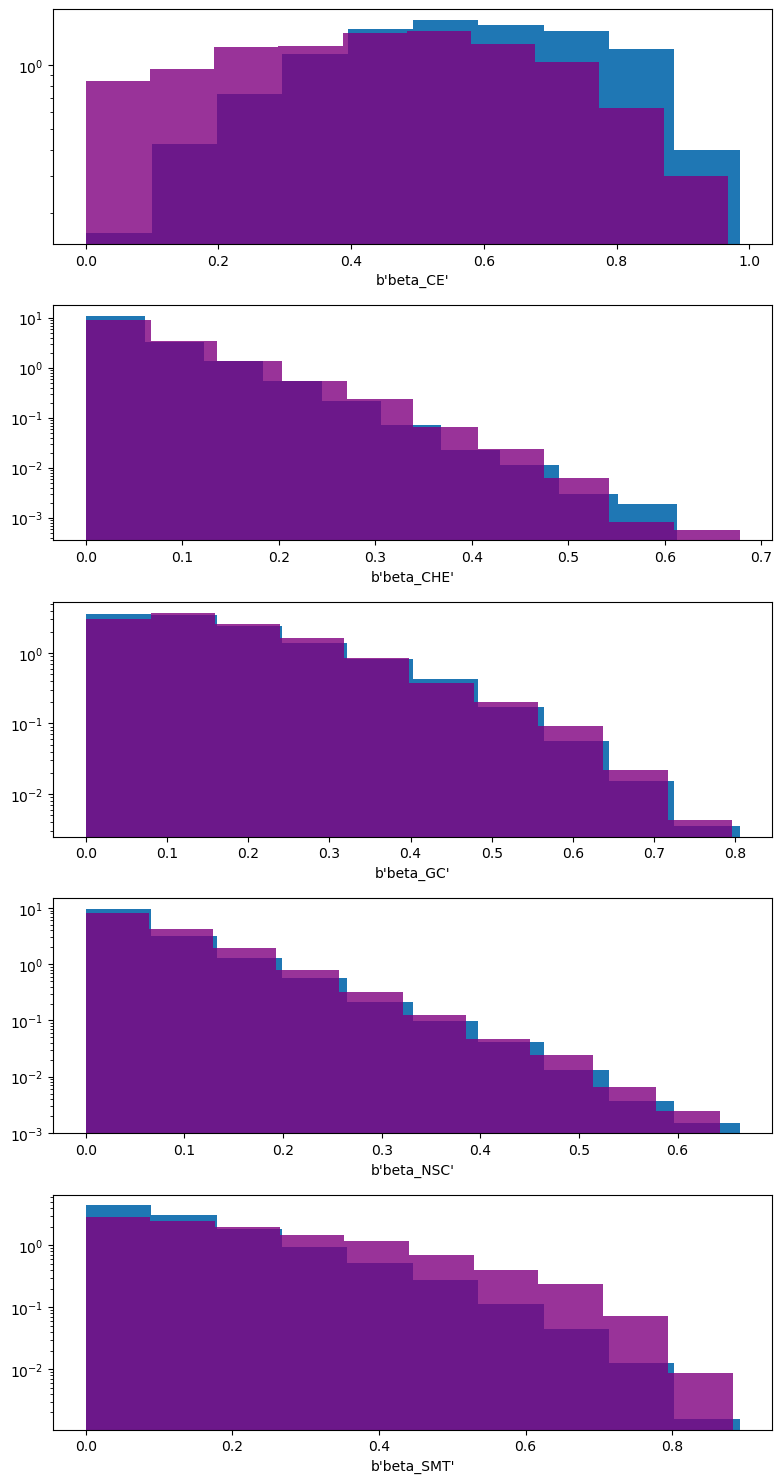

In [8]:
plt.rcParams["figure.figsize"] = (8,15)
fig, ax = plt.subplots(5)
for i in range(5):
    ax[i].hist(branching_fracs[:,i], density=True)
    ax[i].hist(branching_fracs_kde[:,i], density=True, color='purple', alpha=0.8)
    ax[i].set_yscale('log')
    ax[i].set_xlabel(list(flow_file['model_selection']['samples']['block0_items'])[i])
fig.tight_layout(pad=1.3)